In [1]:
#This notebook is for analysis on the cBioPortal clinical data
#The goal is to get an idea of how to find related attributes between different studies

#load in packages
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Levenshtein
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size':20})

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [6]:
#load tcga data
file_list = np.loadtxt("data_clinical_files_all.txt", dtype=str)
study_names = np.asarray([i.split('/', 3)[-2] for i in file_list])

df_list = []
n_attributes = []
i=0
study_data = []
for clinical_file in file_list:
    if 'tcga' in clinical_file:
        #load in individual data from files and append to a list
        df = pd.read_table(clinical_file, skiprows=0)
        if (list(df)[0]!='SAMPLE_ID' and list(df)[0]!='PATIENT_ID'):
            rows_to_skip=df[(df[df.columns[0]]=="SAMPLE_ID") | (df[df.columns[0]]=="PATIENT_ID") | (df[df.columns[0]]=="OTHER_PATIENT_ID") | (df[df.columns[0]]=="OTHER_SAMPLE_ID")].index[0]+1
            df = pd.read_table(clinical_file, skiprows=rows_to_skip)
        df.columns = map(str.upper, df.columns)
        n_attributes.append(df.shape[1])
        df_list.append(df)
        study_name = clinical_file.split('/', 3)[-2]
        col_names = list(df)
        study_data.append((study_name, col_names))
        i+=1

#combine individual dataframes into a single list
all_data = pd.concat(df_list, ignore_index=True)

##Attributes in common for TCGA studies on cBioPortal

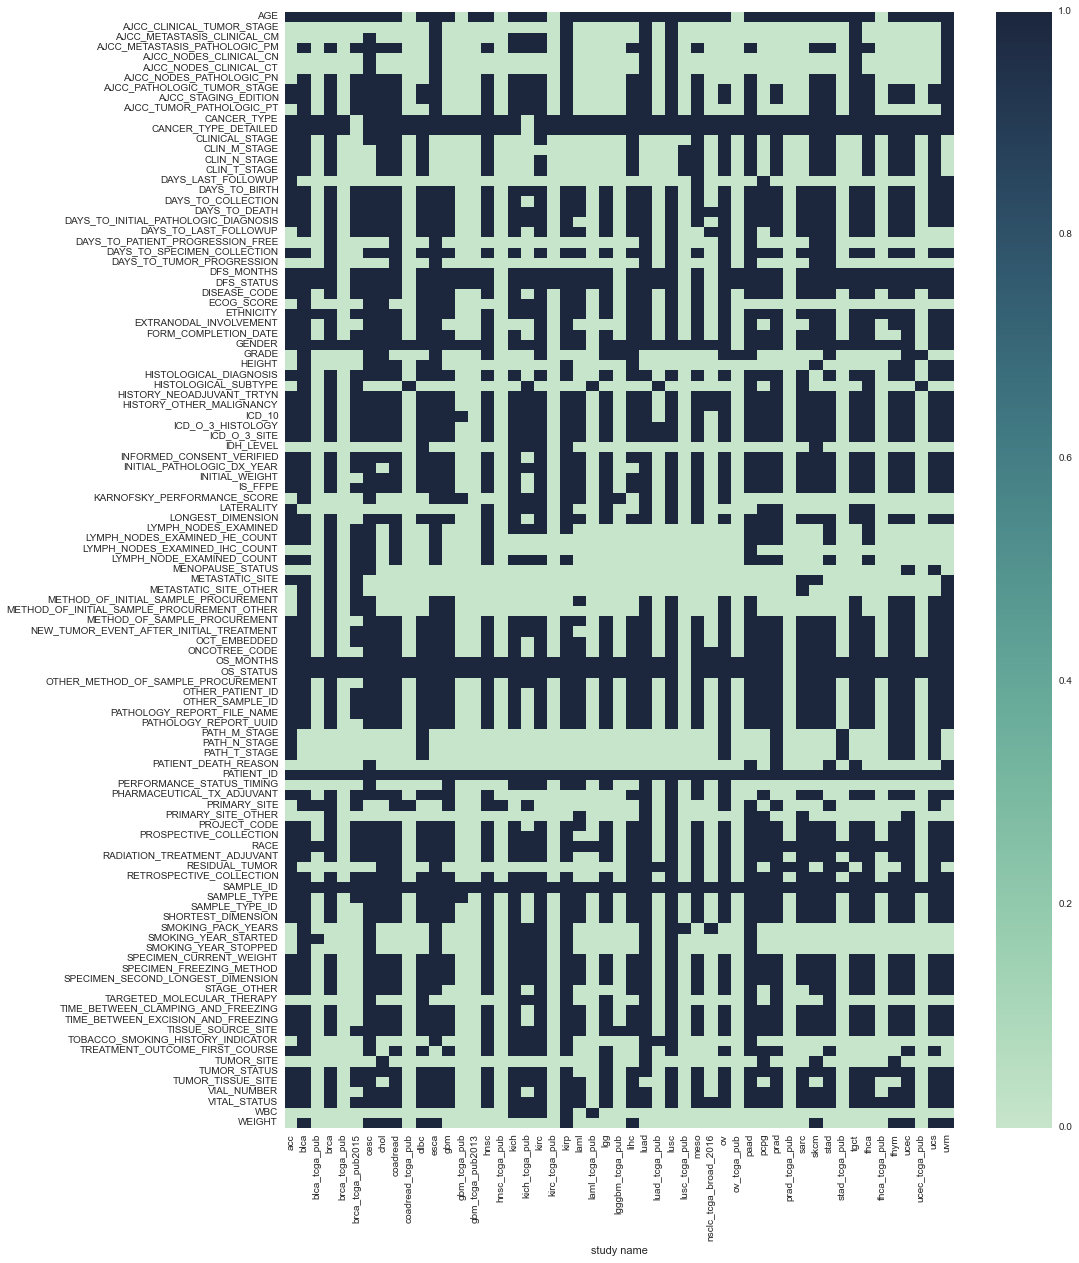

In [11]:
plt.figure(figsize=(15, 20))
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.heatmap(study_data_combined.T>0, cmap=cmap)

##Clustering on attributes for TCGA studies on cBioPortal

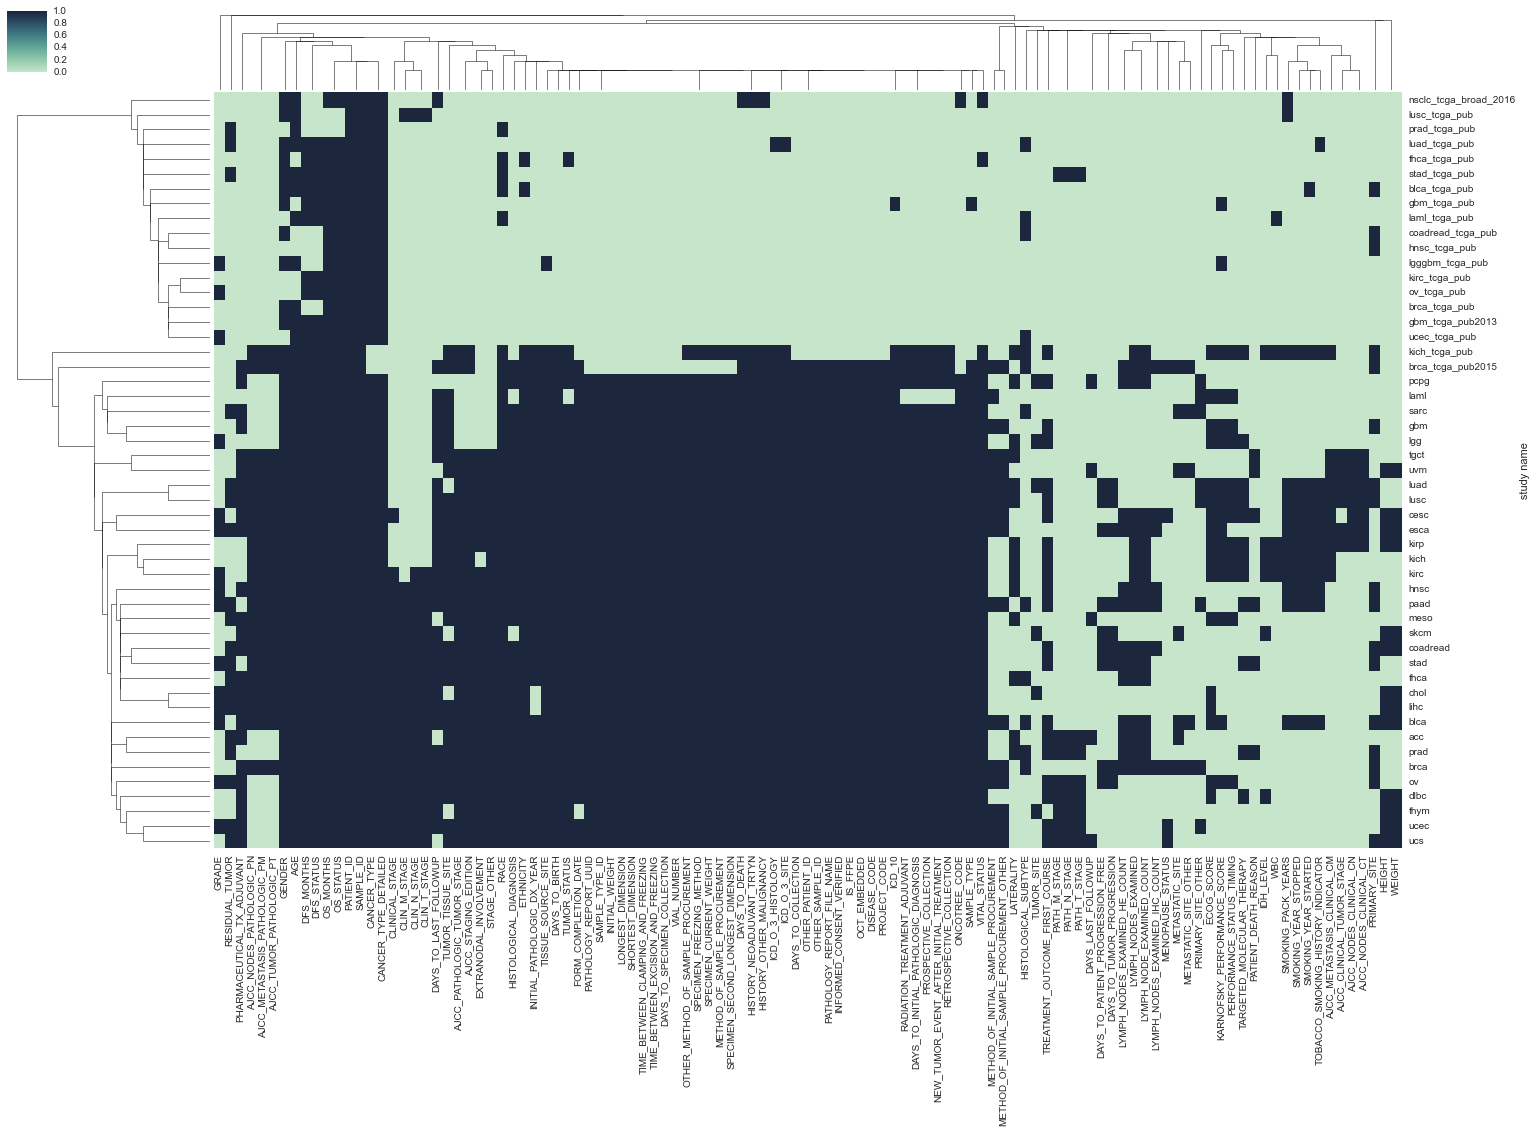

In [14]:
import seaborn
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.clustermap(study_data_combined>0, method='single', metric = 'euclidean', figsize=(25, 15), cmap=cmap)

##Number of common attributes between pairs of TCGA studies

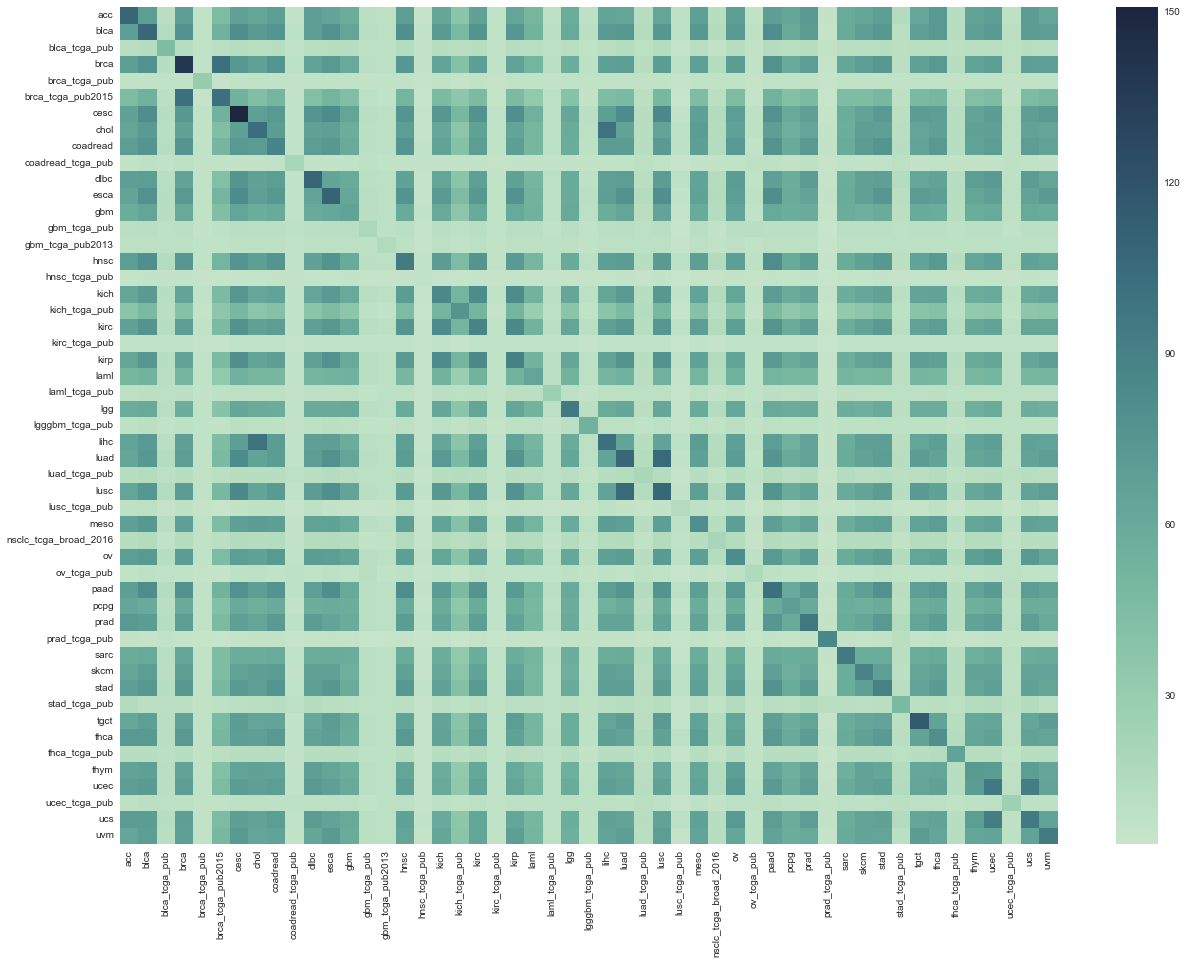

In [28]:
fig, ax = plt.subplots(figsize=(21,15))
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.heatmap(n_common_attributes, cmap=cmap)

##Distribution of attributes in common for each pair of TCGA studies

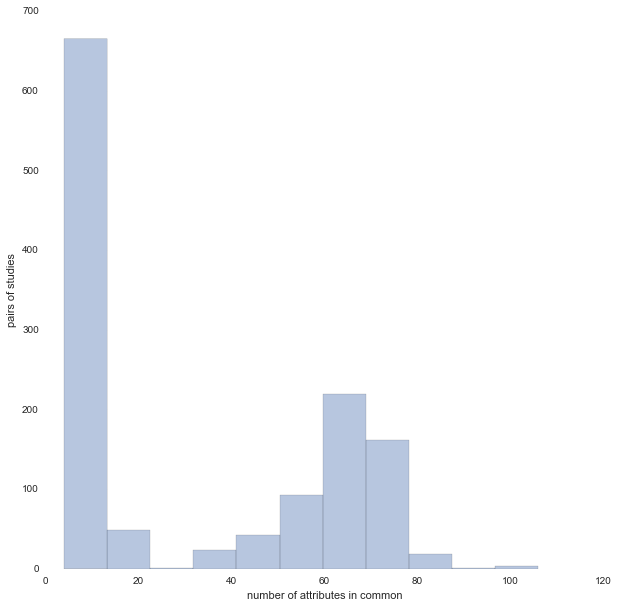

In [29]:
ax=seaborn.distplot(n_attribute_dist, kde=False)
ax.set(ylabel='pairs of studies', xlabel='number of attributes in common')
plt.show()


##Mean number of attributes in common between pairs of TCGA studies

In [30]:
total_common_attributes=sum(np.sum(n_common_attributes-np.triu(n_common_attributes)))
n_studies=n_common_attributes.shape[0]
mean_attributes=total_common_attributes/(n_studies*(n_studies-1)/2)
mean_attributes

33.219607843137254